<a href="https://colab.research.google.com/github/YugaYoshimura/sotsuron/blob/main/yuga_grad_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 必要なデータの定義

In [1]:
#必要なモジュールをimportする
import pandas as pd
import numpy as np
import csv
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import codecs as cd

In [2]:
# 牌変換コード
hai2code = ["0", "1m", "2m", "3m", "4m", "5m", "5M", "6m", "7m", "8m", "9m", "1p", "2p", "3p", "4p", "5p", "5P", "6p", "7p", "8p", "9p", "1s", "2s", "3s", "4s", "5s", "5S", "6s", "7s", "8s", "9s", "1z", "2z", "3z", "4z", "5z", "6z", "7z", "1"]

### データ変換用関数の定義

In [3]:
def convert_M_league_data(dat_2021_0):
  # データの長さの定義
  r = len(dat_2021_0)
  # 点数の入力
  A_p = []
  B_p = []
  C_p = []
  D_p = []
  for k in range(r):
      row = dat_2021_0.iloc[k]
      if k == 0:
          ap = row[1].split("'")
          ap[3] = ap[3].replace("=","")
          A_p.append(int(ap[3]))
      elif k == 1:
          bp = row[1].split("'")
          bp[3] = bp[3].replace("=","")
          B_p.append(int(bp[3]))
      elif k == 2:
          cp = row[1].split("'")
          cp[3] = cp[3].replace("=","")
          C_p.append(int(cp[3]))
      elif k == 3:
          dp = row[1].split("'")
          dp[3] = dp[3].replace("=","")
          D_p.append(int(dp[3]))
  # 親・本場・供託情報の抽出
  kyoku_0 = dat_2021_0.columns.values[1]
  kyoku = []
  kyoku_1 = []
  oya_honba_kyoutaku = []
  kyoku_1 = oya_honba_kyoutaku.append(kyoku_0[7])
  kyoku_1 = oya_honba_kyoutaku.append(kyoku_0[13])
  kyoku_1 = oya_honba_kyoutaku.append(kyoku_0[18])
  kyoku_1 = kyoku.append(kyoku_0[-28:-26])
  kyoku_1 = kyoku.append(kyoku_0[-22:-20])
  kyoku_1 = kyoku.append(kyoku_0[-16:-14])
  kyoku_1 = kyoku.append(kyoku_0[-10:-8])
  kyoku_1 = kyoku.append(kyoku_0[-4:-2])
  kyoku = [hai2code.index(v) for v in kyoku]
  tsumibou = [int(oya_honba_kyoutaku[1]), int(oya_honba_kyoutaku[2])]

  # 配牌を並べて手牌を作る
  A_h = []
  B_h = []
  C_h = []
  D_h = []

  for i in range(r):
      row = dat_2021_0.iloc[i]
      if row[0] == "haipai" and row[1][2] == "A":
          A_h.append(row[1])
      if row[0] == "haipai" and row[1][2] == "B":
          B_h.append(row[1])
      if row[0] == "haipai" and row[1][2] == "C":
          C_h.append(row[1])
      if row[0] == "haipai" and row[1][2] == "D":
          D_h.append(row[1])

  a = []
  a.append(A_h[0][8:16])
  a.append(A_h[1][8:16])
  a.append(A_h[2][8:16])
  a.append(A_h[3][8:10])
  result_a = "".join(a)
  A_h = (re.split('(..)', result_a)[1::2])

  b = []
  b.append(B_h[0][8:16])
  b.append(B_h[1][8:16])
  b.append(B_h[2][8:16])
  b.append(B_h[3][8:10])
  result_b = "".join(b)
  B_h = (re.split('(..)', result_b)[1::2])

  c = []
  c.append(C_h[0][8:16])
  c.append(C_h[1][8:16])
  c.append(C_h[2][8:16])
  c.append(C_h[3][8:10])
  result_c = "".join(c)
  C_h = (re.split('(..)', result_c)[1::2])

  d = []
  d.append(D_h[0][8:16])
  d.append(D_h[1][8:16])
  d.append(D_h[2][8:16])
  d.append(D_h[3][8:10])
  result_d = "".join(d)
  D_h = (re.split('(..)', result_d)[1::2])

  # 鳴き
  A_n1 = ["0"] * 4
  B_n1 = ["0"] * 4
  C_n1 = ["0"] * 4
  D_n1 = ["0"] * 4
  A_n2 = ["0"] * 4
  B_n2 = ["0"] * 4
  C_n2 = ["0"] * 4
  D_n2 = ["0"] * 4
  A_n3 = ["0"] * 4
  B_n3 = ["0"] * 4
  C_n3 = ["0"] * 4
  D_n3 = ["0"] * 4
  A_n4 = ["0"] * 4
  B_n4 = ["0"] * 4
  C_n4 = ["0"] * 4
  D_n4 = ["0"] * 4
  # 立直
  A_r = ["0"]
  B_r = ["0"]
  C_r = ["0"]
  D_r = ["0"]
  # 河
  A_k = ["0"] * 25
  B_k = ["0"] * 25
  C_k = ["0"] * 25
  D_k = ["0"] * 25
  # 場面の情報まとめ
  dora = ["0"] * 4
  dora_num = 0
  # 親情報
  oya_A = ["0"]
  oya_B = ["0"]
  oya_C = ["0"]
  oya_D = ["0"]
  # データ整理用リスト
  A_shiten = []
  B_shiten = []
  C_shiten = []
  D_shiten = []
  A_shiten_1 = []
  B_shiten_1 = []
  C_shiten_1 = []
  D_shiten_1 = []

  # データを一行ずつ見ていく処理
  for x in range(5,r-4):
      row0 = dat_2021_0.iloc[x-1]
      row = dat_2021_0.iloc[x]
      row1 = dat_2021_0.iloc[x+1]
      row2 = dat_2021_0.iloc[x+2]
      row3 = dat_2021_0.iloc[x+3]
      row4 = dat_2021_0.iloc[x+4]
      A_n_num = 1
      B_n_num = 1
      C_n_num = 1
      D_n_num = 1

      # ドラの情報
      if row[0] == "dora":
          dora[dora_num] = row[1][2:4]
          dora_num += 1

      # 親かどうかの判断
      if oya_honba_kyoutaku[0] == "A":
          oya_A = [1]

      elif oya_honba_kyoutaku[0] == "B":
          oya_B = [1]

      elif oya_honba_kyoutaku[0] == "C":
          oya_C = [1]

      elif oya_honba_kyoutaku[0] == "D":
          oya_D = [1]

      # 鳴くのかツモるのかで場合分けしてプレイヤーごとに_tsを入力（ex.Aの時はA_tsに追加する）
      # ツモ切りが0、手出しが1
      # 立直の時
      if row[1][8:10] == "ri" and row[1][2] == "A":
          A_r = ["1"]
          t = row0[1][-4:-2]
          s = row1[1][8:10]
          if row1[1][-4:-2] == "ri":
              A_ts = [t, s, "0"]
          else:
              A_ts = [t, s, "1"]

      elif row[1][8:10] == "ri" and row[1][2] == "B":
          B_r = ["1"]
          t = row0[1][-4:-2]
          s = row1[1][8:10]
          if row1[1][-4:-2] == "ri":
              B_ts = [t, s, "0"]
          else:
              B_ts = [t, s, "1"]

      elif row[1][8:10] == "ri" and row[1][2] == "C":
          C_r = ["1"]
          t = row0[1][-4:-2]
          s = row1[1][8:10]
          if row1[1][-4:-2] == "ri":
              C_ts = [t, s, 0]
          else:
              C_ts = [t, s, "1"]

      elif row[1][8:10] == "ri" and row[1][2] == "D":
          D_r = ["1"]
          t = row0[1][-4:-2]
          s = row1[1][8:10]
          if row1[1][-4:-2] == "ri":
              D_ts = [t, s, "0"]
          else:
              D_ts = [t, s, "1"]
      # カンの時
      elif row[1][8:10] == "ka" and row[1][2] == "A":
          if A_n_num == 1:
              A_n1 =[]
              A_n1.append(row1[1][-11:-3])
              A_n1 = "".join(A_n1)
              A_n1 = (re.split('(..)', A_n1)[1::2])
              nnn = A_h.index(A_n1[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n1[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n1[0])
              A_h[nnn] = "0"
              try :
                nnn = A_h.index(A_n1[0])
                A_h[nnn] = "0"
              except :
                pass
          elif A_n_num == 2:
              A_n2 = []
              A_n2.append(row1[1][-11:-3])
              A_n2 = "".join(A_n2)
              A_n2 = (re.split('(..)', A_n2)[1::2])
              nnn = A_h.index(A_n2[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n2[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n2[0])
              A_h[nnn] = "0"
              try :
                nnn = A_h.index(A_n2[0])
                A_h[nnn] = "0"
              except :
                pass
          elif A_n_num == 3:
              A_n3 = []
              A_n3.append(row1[1][-11:-3])
              A_n3 = "".join(A_n3)
              A_n3 = (re.split('(..)', A_n3)[1::2])
              nnn = A_h.index(A_n3[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n3[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n3[0])
              A_h[nnn] = "0"
              try :
                nnn = A_h.index(A_n3[0])
                A_h[nnn] = "0"
              except :
                pass
          elif A_n_num == 4:
              A_n4 = []
              A_n4.append(row1[1][-11:-3])
              A_n4 = "".join(A_n4)
              A_n4 = (re.split('(..)', A_n4)[1::2])
              nnn = A_h.index(A_n4[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n4[0])
              A_h[nnn] = "0"
              nnn = A_h.index(A_n4[0])
              A_h[nnn] = "0"
              try :
                nnn = A_h.index(A_n4[0])
                A_h[nnn] = "0"
              except :
                pass
      elif row[1][8:10] == "ka" and row[1][2] == "B":
          if B_n_num == 1:
              B_n1 = []
              B_n1.append(row1[1][-11:-3])
              B_n1 = "".join(B_n1)
              B_n1 = (re.split('(..)', B_n1)[1::2])
              nnn = B_h.index(B_n1[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n1[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n1[0])
              B_h[nnn] = "0"
              try :
                nnn = B_h.index(B_n1[0])
                B_h[nnn] = "0"
              except:
                pass
          elif B_n_num == 2:
              B_n2 = []
              B_n2.append(row1[1][-11:-3])
              B_n2 = "".join(B_n2)
              B_n2 = (re.split('(..)', B_n2)[1::2])
              nnn = B_h.index(B_n2[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n2[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n2[0])
              B_h[nnn] = "0"
              try :
                nnn = B_h.index(B_n2[0])
                B_h[nnn] = "0"
              except :
                pass
          elif B_n_num == 3:
              B_n3 = []
              B_n3.append(row1[1][-11:-3])
              B_n3 = "".join(B_n3)
              B_n3 = (re.split('(..)', B_n3)[1::2])
              nnn = B_h.index(B_n3[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n3[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n3[0])
              B_h[nnn] = "0"
              try:
                nnn = B_h.index(B_n3[0])
                B_h[nnn] = "0"
              except :
                pass
          elif B_n_num == 4:
              B_n4 = []
              B_n4.append(row1[1][-11:-3])
              B_n4 = "".join(B_n4)
              B_n4 = (re.split('(..)', B_n4)[1::2])
              nnn = B_h.index(B_n4[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n4[0])
              B_h[nnn] = "0"
              nnn = B_h.index(B_n4[0])
              B_h[nnn] = "0"
              try :
                nnn = B_h.index(B_n4[0])
                B_h[nnn] = "0"
              except :
                pass
      elif row[1][8:10] == "ka" and row[1][2] == "C":
          if C_n_num == 1:
              C_n1 = []
              C_n1.append(row1[1][-11:-3])
              C_n1 = "".join(C_n1)
              C_n1 = (re.split('(..)', C_n1)[1::2])
              nnn = C_h.index(C_n1[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n1[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n1[0])
              C_h[nnn] = "0"
              try :
                nnn = C_h.index(C_n1[0])
                C_h[nnn] = "0"
              except :
                pass
          elif C_n_num == 2:
              C_n2 = []
              C_n2.append(row1[1][-11:-3])
              C_n2 = "".join(C_n2)
              C_n2 = (re.split('(..)', C_n2)[1::2])
              nnn = C_h.index(C_n2[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n2[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n2[0])
              C_h[nnn] = "0"
              try :
                nnn = C_h.index(C_n2[0])
                C_h[nnn] = "0"
              except :
                pass
          elif C_n_num == 3:
              C_n3 = []
              C_n3.append(row1[1][-11:-3])
              C_n3 = "".join(C_n3)
              C_n3 = (re.split('(..)', C_n3)[1::2])
              nnn = C_h.index(C_n3[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n3[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n3[0])
              C_h[nnn] = "0"
              try :
                nnn = C_h.index(C_n3[0])
                C_h[nnn] = "0"
              except :
                pass
          elif C_n_num == 4:
              C_n4 = []
              C_n4.append(row1[1][-11:-3])
              C_n4 = "".join(C_n4)
              C_n4 = (re.split('(..)', C_n4)[1::2])
              nnn = C_h.index(C_n4[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n4[0])
              C_h[nnn] = "0"
              nnn = C_h.index(C_n4[0])
              C_h[nnn] = "0"
              try :
                nnn = C_h.index(C_n4[0])
                C_h[nnn] = "0"
              except :
                pass
      elif row[1][8:10] == "ka" and row[1][2] == "D":
          if D_n_num == 1:
              D_n1 = []
              D_n1.append(row1[1][-11:-3])
              D_n1 = "".join(D_n1)
              D_n1 = (re.split('(..)', D_n1)[1::2])
              nnn = D_h.index(D_n1[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n1[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n1[0])
              D_h[nnn] = "0"
              try :
                nnn = D_h.index(D_n1[0])
                D_h[nnn] = "0"
              except :
                pass
          elif D_n_num == 2:
              D_n2 = []
              D_n2.append(row1[1][-11:-3])
              D_n2 = "".join(D_n2)
              D_n2 = (re.split('(..)', D_n2)[1::2])
              nnn = D_h.index(D_n2[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n2[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n2[0])
              D_h[nnn] = "0"
              try :
                nnn = D_h.index(D_n2[0])
                D_h[nnn] = "0"
              except :
                pass
          elif D_n_num == 3:
              D_n3 = []
              D_n3.append(row1[1][-11:-3])
              D_n3 = "".join(D_n3)
              D_n3 = (re.split('(..)', D_n3)[1::2])
              nnn = D_h.index(D_n3[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n3[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n3[0])
              D_h[nnn] = "0"
              try :
                nnn = D_h.index(D_n3[0])
                D_h[nnn] = "0"
              except :
                pass
          elif D_n_num == 4:
              D_n4 = []
              D_n4.append(row1[1][-11:-3])
              D_n4 = "".join(D_n4)
              D_n4 = (re.split('(..)', D_n4)[1::2])
              nnn = D_h.index(D_n4[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n4[0])
              D_h[nnn] = "0"
              nnn = D_h.index(D_n4[0])
              D_h[nnn] = "0"
              try :
                nnn = D_h.index(D_n4[0])
                D_h[nnn] = "0"
              except :
                pass

      # ポンまたはチーの時
      elif row[1][8:10] == "po" or row[1][8:10] =="ch":
          if row[1][2] == "A":
              if A_n_num == 1:
                  A_n1 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  A_n1.append(row1[1][9:13])
                  A_n1.append(t)
                  A_n1 = "".join(A_n1)
                  A_n1 = (re.split('(..)', A_n1)[1::2])
                  A_n1.extend(["0"])
                  A_ts = [t, s, "1"]
                  nnn = A_h.index(A_n1[0])
                  A_h[nnn] = "0"
                  nnn = A_h.index(A_n1[1])
                  A_h[nnn] = "0"
              elif A_n_num == 2:
                  A_n2 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  A_n2.append(row1[1][9:13])
                  A_n2.append(t)
                  A_n2 = "".join(A_n2)
                  A_n2 = (re.split('(..)', A_n2)[1::2])
                  A_n2.append("0")
                  A_ts = [t, s, "1"]
                  nnn = A_h.index(A_n2[0])
                  A_h[nnn] = "0"
                  nnn = A_h.index(A_n2[1])
                  A_h[nnn] = "0"
              elif A_n_num == 3:
                  A_n3 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  A_n3.append(row1[1][9:13])
                  A_n3.append(t)
                  A_n3 = "".join(A_n3)
                  A_n3 = (re.split('(..)', A_n3)[1::2])
                  A_n3.append("0")
                  A_ts = [t, s, "1"]
                  nnn = A_h.index(A_n3[0])
                  A_h[nnn] = "0"
                  nnn = A_h.index(A_n3[1])
                  A_h[nnn] = "0"
              elif A_n_num == 4:
                  A_n4 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  A_n4.append(row1[1][9:13])
                  A_n4.append(t)
                  A_n4 = "".join(A_n4)
                  A_n4 = (re.split('(..)', A_n4)[1::2])
                  A_n4.append("0")
                  A_ts = [t, s, "1"]
                  nnn = A_h.index(A_n4[0])
                  A_h[nnn] = "0"
                  nnn = A_h.index(A_n4[1])
                  A_h[nnn] = "0"

          elif row[1][2] == "B":
              if B_n_num == 1:
                  B_n1 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  B_n1.append(row1[1][9:13])
                  B_n1.append(t)
                  B_n1 = "".join(B_n1)
                  B_n1 = (re.split('(..)', B_n1)[1::2])
                  B_n1.append("0")
                  B_ts = [t, s, "1"]
                  nnn = B_h.index(B_n1[0])
                  B_h[nnn] = "0"
                  nnn = B_h.index(B_n1[1])
                  B_h[nnn] = "0"
              elif B_n_num == 2:
                  B_n2 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  B_n2.append(row1[1][9:13])
                  B_n2.append(t)
                  B_n2 = "".join(B_n2)
                  B_n2 = (re.split('(..)', B_n2)[1::2])
                  B_n2.append("0")
                  B_ts = [t, s, 1]
                  nnn = B_h.index(B_n2[0])
                  B_h[nnn] = "0"
                  nnn = B_h.index(B_n2[1])
                  B_h[nnn] = "0"
              elif B_n_num == 3:
                  B_n3 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  B_n3.append(row1[1][9:13])
                  B_n3.append(t)
                  B_n3 = "".join(B_n3)
                  B_n3 = (re.split('(..)', B_n3)[1::2])
                  B_n3.append("0")
                  B_ts = [t, s, "1"]
                  nnn = B_h.index(B_n3[0])
                  B_h[nnn] = "0"
                  nnn = B_h.index(B_n3[1])
                  B_h[nnn] = "0"
              elif B_n_num == 4:
                  B_n4 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  B_n4.append(row1[1][9:13])
                  B_n4.append(t)
                  B_n4 = "".join(B_n4)
                  B_n4 = (re.split('(..)', B_n4)[1::2])
                  B_n4.append("0")
                  B_ts = [t, s, "1"]
                  nnn = B_h.index(B_n4[0])
                  B_h[nnn] = "0"
                  nnn = B_h.index(B_n4[1])
                  B_h[nnn] = "0"

          elif row[1][2] == "C":
              if C_n_num == 1:
                  C_n1 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  C_n1.append(row1[1][9:13])
                  C_n1.append(t)
                  C_n1 = "".join(C_n1)
                  C_n1 = (re.split('(..)', C_n1)[1::2])
                  C_n1.append("0")
                  C_ts = [t, s, "1"]
                  nnn = C_h.index(C_n1[0])
                  C_h[nnn] = "0"
                  nnn = C_h.index(C_n1[1])
                  C_h[nnn] = "0"
              elif C_n_num == 2:
                  C_n2 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  C_n2.append(row1[1][9:13])
                  C_n2.append(t)
                  C_n2 = "".join(C_n2)
                  C_n2 = (re.split('(..)', C_n2)[1::2])
                  C_n2.append("0")
                  C_ts = [t, s, "1"]
                  nnn = C_h.index(C_n2[0])
                  C_h[nnn] = "0"
                  nnn = C_h.index(C_n2[1])
                  C_h[nnn] = "0"
              elif C_n_num == 3:
                  C_n3 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  C_n3.append(row1[1][9:13])
                  C_n3.append(t)
                  C_n3 = "".join(C_n3)
                  C_n3 = (re.split('(..)', C_n3)[1::2])
                  C_n3.append("0")
                  C_ts = [t, s, "1"]
                  nnn = C_h.index(C_n3[0])
                  C_h[nnn] = "0"
                  nnn = C_h.index(C_n3[1])
                  C_h[nnn] = "0"
              elif C_n_num == 4:
                  C_n4 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  C_n4.append(row1[1][9:13])
                  C_n4.append(t)
                  C_n4 = "".join(C_n4)
                  C_n4 = (re.split('(..)', C_n4)[1::2])
                  C_n4.append("0")
                  C_ts = [t, s, 1]
                  nnn = C_h.index(C_n4[0])
                  C_h[nnn] = "0"
                  nnn = C_h.index(C_n4[1])
                  C_h[nnn] = "0"

          elif row[1][2] == "D":
              if D_n_num == 1:
                  D_n1 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  D_n1.append(row1[1][9:13])
                  D_n1.append(t)
                  D_n1 = "".join(D_n1)
                  D_n1 = (re.split('(..)', D_n1)[1::2])
                  D_n1.append("0")
                  D_ts = [t, s, "1"]
                  nnn = D_h.index(D_n1[0])
                  D_h[nnn] = "0"
                  nnn = D_h.index(D_n1[1])
                  D_h[nnn] = "0"
              elif D_n2[0] == 0:
                  D_n2 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  D_n2.append(row1[1][9:13])
                  D_n2.append(t)
                  D_n2 = "".join(D_n2)
                  D_n2 = (re.split('(..)', D_n2)[1::2])
                  D_n2.append("0")
                  D_ts = [t, s, "1"]
                  nnn = D_h.index(D_n2[0])
                  D_h[nnn] = "0"
                  nnn = D_h.index(D_n2[1])
                  D_h[nnn] = "0"
              elif D_n_num == 3:
                  D_n3 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  D_n3.append(row1[1][9:13])
                  D_n3.append(t)
                  D_n3 = "".join(D_n3)
                  D_n3 = (re.split('(..)', D_n3)[1::2])
                  D_n3.append("0")
                  D_ts = [t, s, "1"]
                  nnn = D_h.index(D_n3[0])
                  D_h[nnn] = "0"
                  nnn = D_h.index(D_n3[1])
                  D_h[nnn] = "0"
              elif D_n_num == 4:
                  D_n4 = []
                  t = row1[1][18:20]
                  s = row2[1][8:10]
                  D_n4.append(row1[1][9:13])
                  D_n4.append(t)
                  D_n4 = "".join(D_n4)
                  D_n4 = (re.split('(..)', D_n4)[1::2])
                  D_n4.append("0")
                  D_ts = [t, s, "1"]
                  nnn = D_h.index(D_n4[0])
                  D_h[nnn] = "0"
                  nnn = D_h.index(D_n4[1])
                  D_h[nnn] = "0"

      #　鳴かずにツモって来た時
      elif row[0] == "tsumo" and row[1][2] == "A":
          if row1[0] == "sutehai":
              if row[1][-4:-2] != "an":
                  t = row[1][-4:-2]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      A_ts = [t, s, "0"]
                  else:
                      A_ts = [t, s, "1"]
              else:
                  t = row[1][-15:-13]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      A_ts = [t, s, "0"]
                  else:
                      A_ts = [t, s, "1"]

      elif row[0] == "tsumo" and row[1][2] == "B":
          if row1[0] == "sutehai":
              if row[1][-4:-2] != "an":
                  t = row[1][-4:-2]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      B_ts = [t, s, "0"]
                  else:
                      B_ts = [t, s, "1"]
              else:
                  t = row[1][-15:-13]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      B_ts = [t, s, "0"]
                  else:
                      B_ts = [t, s, "1"]

      elif row[0] == "tsumo" and row[1][2] == "C":
          if row1[0] == "sutehai":
              if row[1][-4:-2] != "an":
                  t = row[1][-4:-2]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      C_ts = [t, s, "0"]
                  else:
                      C_ts = [t, s, "1"]
              else:
                  t = row[1][-15:-13]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      C_ts = [t, s, "0"]
                  else:
                      C_ts = [t, s, "1"]

      elif row[0] == "tsumo" and row[1][2] == "D":
          if row1[0] == "sutehai":
              if row[1][-4:-2] != "an":
                  t = row[1][-4:-2]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      D_ts = [t, s, "0"]
                  else:
                      D_ts = [t, s, "1"]
              else:
                  t = row[1][-15:-13]
                  s = row1[1][8:10]
                  if row1[1][-4:-2] == "ri":
                      D_ts = [t, s, "0"]
                  else:
                      D_ts = [t, s, "1"]

      #　_h（手牌）と_k（河（捨て牌の並び））を更新する
      #　x>22にしてるのはそこまでは配牌や局情報が書かれており、ツモの動作がないため
      if x > 22:
          if row[0] == "sutehai" and row[1][2] == "A":
              A_k_num = A_k.index("0")
              A_tmp = A_k.copy()
              if A_ts[2] == "1":
                  idx = A_h.index(s)
                  A_h[idx] = t
                  A_k[A_k_num] = s
              elif A_ts[2] == "0":
                  A_k[A_k_num] = t

              ji_num = [hai2code.index(v) for v in A_h]
              ji_num.sort()
              A_h = [hai2code[i] for i in ji_num]

              A_ts_1 = []
              A_ts_1.append(A_ts[0])
              A_ts_1.append(A_ts[2])
              A_ts_2 = []
              A_ts_2.append(A_ts[1])
              A_ts_2 = [hai2code.index(v) for v in A_ts_2]
              A_ts[1] = [hai2code.index(A_ts[1])]
              player_A = []
              A_m = A_h + A_ts_1 + A_tmp + A_n1 + A_n2 + A_n3 + A_n4 + A_r + B_k + B_n1 + B_n2 + B_n3 + B_n4 + B_r + C_k + C_n1 + C_n2 + C_n3 + C_n4 + C_r + D_k + D_n1 + D_n2 + D_n3 + D_n4 + D_r + dora
              A_m = [hai2code.index(v) for v in A_m]
              player_A = A_m + oya_A + tsumibou + A_p + B_p + C_p + D_p
              A_shiten_1.extend(A_ts_2)
              A_shiten.append(player_A)

          elif row[0] == "sutehai" and row[1][2] == "B":
              B_k_num = B_k.index("0")
              B_tmp = B_k.copy()
              if B_ts[2] == "1":
                  idx = B_h.index(s)
                  B_h[idx] = t
                  B_k[B_k_num] = s
              elif B_ts[2] == "0":
                  B_k[B_k_num] = t

              ji_num = [hai2code.index(v) for v in B_h]
              ji_num.sort()
              B_h = [hai2code[i] for i in ji_num]

              B_ts_1 = []
              B_ts_1.append(B_ts[0])
              B_ts_1.append(B_ts[2])
              B_ts_2 = []
              B_ts_2.append(B_ts[1])
              B_ts_2 = [hai2code.index(v) for v in B_ts_2]
              B_ts[1] = [hai2code.index(B_ts[1])]
              player_B = []
              B_m = B_h + B_ts_1 + B_tmp + B_n1 + B_n2 + B_n3 + B_n4 + B_r + C_k + C_n1 + C_n2 + C_n3 + C_n4 + C_r + D_k + D_n1 + D_n2 + D_n3 + D_n4 + D_r + A_k + A_n1 + A_n2 + A_n3 + A_n4 + A_r + dora
              B_m = [hai2code.index(v) for v in B_m]
              player_B = B_m + oya_B + tsumibou + B_p + C_p + D_p + A_p
              B_shiten_1.extend(B_ts_2)
              B_shiten.append(player_B)

          elif row[0] == "sutehai" and row[1][2] == "C":
              C_k_num = C_k.index("0")
              C_tmp = C_k.copy()
              if C_ts[2] == "1":
                  idx = C_h.index(s)
                  C_h[idx] = t
                  C_k[C_k_num] = s
              elif C_ts[2] == "0":
                  C_k[C_k_num] = t

              ji_num = [hai2code.index(v) for v in C_h]
              ji_num.sort()
              C_h = [hai2code[i] for i in ji_num]

              C_ts_1 = []
              C_ts_1.append(C_ts[0])
              C_ts_1.append(C_ts[2])
              C_ts_2 = []
              C_ts_2.append(C_ts[1])
              C_ts_2 = [hai2code.index(v) for v in C_ts_2]
              C_ts[1] = [hai2code.index(C_ts[1])]
              player_C = []
              C_m = C_h + C_ts_1 + C_tmp + C_n1 + C_n2 + C_n3 + C_n4 + C_r + D_k + D_n1 + D_n2 + D_n3 + D_n4 + D_r + A_k + A_n1 + A_n2 + A_n3 + A_n4 + A_r + B_k + B_n1 + B_n2 + B_n3 + B_n4 + B_r + dora
              C_m = [hai2code.index(v) for v in C_m]
              player_C = C_m + oya_C + tsumibou + C_p + D_p + A_p + D_p
              C_shiten_1.extend(C_ts_2)
              C_shiten.append(player_C)

          elif row[0] == "sutehai" and row[1][2] == "D":
              D_k_num = D_k.index("0")
              D_tmp = D_k.copy()
              if D_ts[2] == "1":
                  idx = D_h.index(s)
                  D_h[idx] = t
                  D_k[D_k_num] = s
              elif D_ts[2] == "0":
                  D_k[D_k_num] = t

              ji_num = [hai2code.index(v) for v in D_h]
              ji_num.sort()
              D_h = [hai2code[i] for i in ji_num]

              D_ts_1 = []
              D_ts_1.append(D_ts[0])
              D_ts_1.append(D_ts[2])
              D_ts_2 = []
              D_ts_2.append(D_ts[1])
              D_ts_2 = [hai2code.index(v) for v in D_ts_2]
              D_ts[1] = [hai2code.index(D_ts[1])]
              player_D = []
              D_m = D_h + D_ts_1 + D_tmp + D_n1 + D_n2 + D_n3 + D_n4 + D_r + A_k + A_n1 + A_n2 + A_n3 + A_n4 + A_r + B_k + B_n1 + B_n2 + B_n3 + B_n4 + B_r + C_k + C_n1 + C_n2 + C_n3 + C_n4 + C_r + dora
              D_m = [hai2code.index(v) for v in D_m]
              player_D = D_m + oya_D + tsumibou + D_p + A_p + B_p + C_p
              D_shiten_1.extend(D_ts_2)
              D_shiten.append(player_D)


  #　xが特徴量、yが教師データ
  x = []
  x.extend(A_shiten)
  x.extend(B_shiten)
  x.extend(C_shiten)
  x.extend(D_shiten)
  y = []
  y.extend(A_shiten_1)
  y.extend(B_shiten_1)
  y.extend(C_shiten_1)
  y.extend(D_shiten_1)

  return x, y

### 規格化用関数の定義

In [4]:
def normalize_data(input, target):
  # 入力データ
  x = []
  for one_data in input:
    x_tmp = []
    # 牌の情報
    for v in one_data[:-6]:
      x_tmp.append(int(v) / (len(hai2code) - 1))
    # 本場・供託情報
    for v in one_data[-6:-4]:
      v = max(0, min(5, v))
      x_tmp.append(v / 5)

    # 点数情報
    for v in one_data[-4:]:
      v = max(0, min(60000, v))
      x_tmp.append(v / 60000)
    x.append(x_tmp)

  # 教師データ
  y = []
  for v in target:
    y.append(int(v) / (len(hai2code) - 1))

  return x, y

In [5]:
def normalize_class_data(input, target):
  # 入力データ
  x = []
  for one_data in input:
    x_tmp = []
    # 牌の情報
    for v in one_data[:-6]:
      x_tmp.append(int(v) / (len(hai2code) - 1))
    # 本場・供託情報
    for v in one_data[-6:-4]:
      v = max(0, min(5, v))
      x_tmp.append(v / 5)

    # 点数情報
    for v in one_data[-4:]:
      v = max(0, min(60000, v))
      x_tmp.append(v / 60000)
    x.append(x_tmp)

  # 教師データ
  y = []
  for v in target:
    y.append(v-1) # "0" と "1" を除いて牌をコード化（"1m" = 0, "2m" = 1, ... , "7z" = 36)

  return x, y

### プログラムの実行

In [8]:
#GoogleDriveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
X_orig = []
Y_orig = []

filenames = ['2021_0.csv', '2021_1.csv', '2021_2.csv', '2021_3.csv', '2021_4.csv', '2021_5.csv', '2021_6.csv', '2021_7.csv', '2021_8.csv', '2021_9.csv', '2021_10.csv', '2021_11.csv', '2021_12.csv', '2021_13.csv', '2021_14.csv', '2021_15.csv', '2021_16.csv', '2021_17.csv']

for fn in filenames:
  filename = f"/content/drive/MyDrive/Colab Notebooks/{fn}"
  with cd.open(filename, "r", "utf-8", "ignore") as csv_file:
    data = pd.read_csv(csv_file, encoding = "utf-8")
    x_tmp, y_tmp = convert_M_league_data(data)
    X_orig.extend(x_tmp)
    Y_orig.extend(y_tmp)

In [12]:
# 多クラス分類として学習する場合
CATEGORICAL = True

In [13]:
X = []
Y = []
if CATEGORICAL:
  X, Y = normalize_class_data(X_orig, Y_orig)
else:
  X, Y = normalize_data(X_orig, Y_orig)

In [14]:
# データをランダムにシャッフル
import random
idx_list = list(range(len(X)))
random.shuffle(idx_list)

X_orig_shuffled = [X_orig[idx] for idx in idx_list]
Y_orig_shuffled = [Y_orig[idx] for idx in idx_list]

X_shuffled = [X[idx] for idx in idx_list]
Y_shuffled = [Y[idx] for idx in idx_list]


In [15]:
# シャッフルされたデータを使うように変更
split_index = int(len(X_shuffled)*0.8)

train_x_orig = X_orig_shuffled[:split_index]
train_y_orig = Y_orig_shuffled[:split_index]
test_x_orig = X_orig_shuffled[split_index:]
test_y_orig = Y_orig_shuffled[split_index:]

train_x = X_shuffled[:split_index]
train_y = Y_shuffled[:split_index]
test_x = X_shuffled[split_index:]
test_y = Y_shuffled[split_index:]
print(len(train_x))

769


In [16]:
# 学習モデル作り
train_x = np.array(train_x)
train_x = train_x.reshape(train_x.shape[0], -1, 1)
test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], -1, 1)

train_y = np.array(train_y)
test_y = np.array(test_y)


input_shape = train_x.shape[1:]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Flatten())
if CATEGORICAL:
  model.add(tf.keras.layers.Dense(len(hai2code)-2, activation="softmax"))
  model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam")
else:
  model.add(tf.keras.layers.Dense(1))
  model.compile(loss = "mse", optimizer="adam")


7/7 [==============================] - 0s 4ms/step


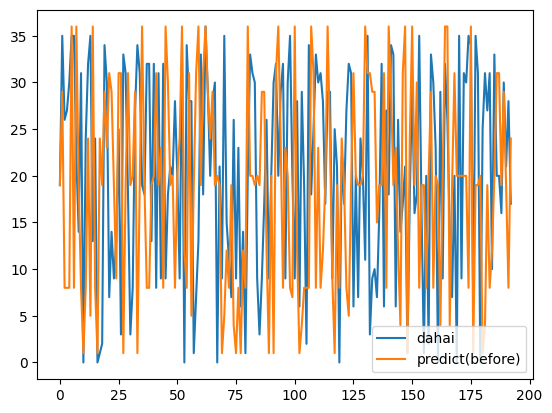

In [17]:
# 学習前のモデルで予測したものをプロットしてみる
if CATEGORICAL:
  plt.plot(np.arange(len(test_y)), test_y, label="dahai")
  predict_y = model.predict(test_x)
  predict_y = np.argmax(predict_y, axis=-1)
  # predict_y = predict_y.reshape(predict_y.shape[:2])
  plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
  plt.legend()
else:
  plt.plot(np.arange(len(test_y)), test_y, label="dahai")
  predict_y = model.predict(test_x)
  predict_y = predict_y.reshape(predict_y.shape[:2])
  plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
  plt.legend()

Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 3.4889
Epoch 2/100
49/49 [==============================] - 0s 6ms/step - loss: 3.2739
Epoch 3/100
49/49 [==============================] - 1s 10ms/step - loss: 3.0005
Epoch 4/100
49/49 [==============================] - 0s 10ms/step - loss: 2.5843
Epoch 5/100
49/49 [==============================] - 0s 10ms/step - loss: 2.2272
Epoch 6/100
49/49 [==============================] - 0s 9ms/step - loss: 1.9616
Epoch 7/100
49/49 [==============================] - 1s 10ms/step - loss: 1.7443
Epoch 8/100
49/49 [==============================] - 1s 10ms/step - loss: 1.5700
Epoch 9/100
49/49 [==============================] - 0s 10ms/step - loss: 1.4381
Epoch 10/100
49/49 [==============================] - 0s 10ms/step - loss: 1.2991
Epoch 11/100
49/49 [==============================] - 0s 10ms/step - loss: 1.1878
Epoch 12/100
49/49 [==============================] - 0s 9ms/step - loss: 1.0490
Epoch 13/100
49/49 [=========

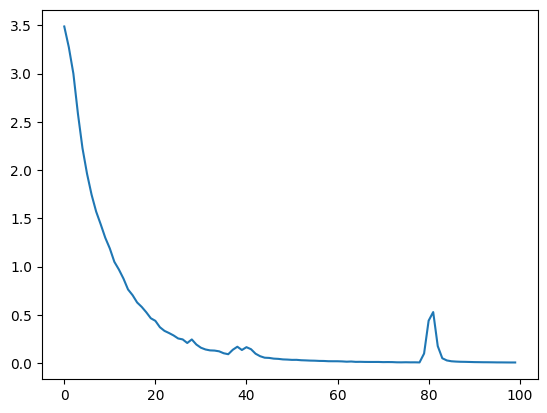

In [18]:
# 学習させる
hist = model.fit(train_x, train_y, batch_size=16, epochs=100, verbose=1)
history = hist.history
plt.plot(hist.epoch, history["loss"], label="loss")

7/7 [==============================] - 0s 6ms/step


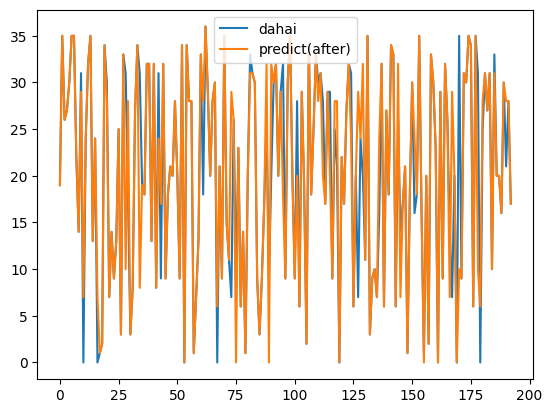

In [19]:
#学習後の予測をプロット
if CATEGORICAL:
  plt.plot(np.arange(len(test_y)), test_y, label="dahai")
  predict_y = model.predict(test_x)
  predict_y = np.argmax(predict_y, axis=-1)
  # predict_y = predict_y.reshape(predict_y.shape[:2])
  plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
  plt.legend()
else:
  plt.plot(np.arange(len(test_y)), test_y, label="dahai")
  predict_y = model.predict(test_x)
  predict_y = predict_y.reshape(predict_y.shape[:2])
  plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
  plt.legend()


In [20]:

i = list(np.equal(predict_y, test_y))
count = i.count(True)

p = count / (len(i))
p

0.7927461139896373

In [21]:
print(predict_y)
print(test_y)
i = list(np.equal(predict_y, test_y))
count = i.count(True)
print(len(i))
p = count / (len(i))
p

[19 35 26 27 30 35 35 22 14 29  7 24 32 35 13 24  7  1  2 34 28  7 14  9
 13 25  3 33 10 28  3  8 27 34  8 19 18 32 32 13 32  8 24 17 32  9 18 21
 20 28 20  9 34  0 34 28 28  1  7 13 33 28 36 29 20 28 30  6 21  9 35 15
 11 29 26  0 23  6 14  1 20 31 31 30  9  3  9 17 32  0 32 30 32 20 29 18
  9 30 35 20  9 20  6 29 19  2 34 18 25 33 28 31 20 17 29 20  9 28 28  0
 22 17 27 32 24  6 20 29 24 32 11 35  3  9 10  7 24 32  6 27 18 34 33  6
 32  7 17 21  1 18 30 24 18 35 16  0 20  2 33 30 23  0 29  9 32 26  7 29
 20  0 10  9 31 30 35 34  6 35 10  6 28 31 27 31 10 31 20 20 16 30 28 28
 17]
[19 35 26 27 30 35 35 22 14 31  0 24 32 35 13 24  0  1  2 34 30  7 14  9
 13 25  3 33 31 18  3  8 27 34 31 19 18 32 32 13 32  8 31  9 32  9 18 21
 20 28 20  9 34  0 34 28 28  1  7 13 33 18 36 29 20 28 30  0 21  9 35 15
 11  7 26  9 23  6 14  1 20 33 31 30  9  3  9 17 26  9 20 30 32 20 29 32
  9 30 35 20  9 28  6 29 19  2 34 18 25 33 30 31 28 17 29 29  9 25 21  0
 22 17 27 32 31  6 20  7 24 20 11 35  3  9 10 

0.7927461139896373

In [22]:
for idx in range(len(test_y)):
  print(test_y[idx], predict_y[idx], test_x[idx])
i = list(np.equal(predict_y, test_y))
count = i.count(True)
print(len(i))
p = count / (len(i))
p

ストリーミング出力は最後の 5000 行に切り捨てられました。
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.84210526]
 [0.05263158]
 [0.94736842]
 [0.89473684]
 [0.57894737]
 [0.65789474]
 [0.78947368]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.89473684]
 [0.94736842]
 [0.76315789]
 [0.84210526]
 [0.02631579]
 [0.5       ]
 [0.63157895]
 [0.86842105]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [

0.7927461139896373